# **Telsa Supercharge Locations Optimization: Exploring Electric Vehicle Charging Stations Across the USA**

## **Problem Description**

In the era of sustainable transportation, Tesla's Supercharger network is pivotal for EV infrastructure. This report analyzes its 11-column dataset to identify geographic and temporal trends and identify potential charging gaps.Contributing insights to sustainable mobility, we navigate data to uncover the intricacies and challenges of Tesla's Supercharger network.

In [38]:
# %pip install pandas

In [39]:
# %pip install matplotlib

In [40]:
# %pip install seaborn

In [41]:
# %pip install geopy

In [42]:
# %pip install PyDrive

In [43]:
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore
import geopy.distance # type: ignore

In [44]:
from pydrive.auth import GoogleAuth # type: ignore
from pydrive.drive import GoogleDrive # type: ignore

In [45]:
gauth = GoogleAuth()
gauth.LocalWebserverAuth()  # This will open a browser window for authentication

drive = GoogleDrive(gauth)

Your browser has been opened to visit:

    https://accounts.google.com/o/oauth2/auth?client_id=656230883833-irc9vhbrrutrbaivo3sg6t6ipui0adpt.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A8080%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&access_type=offline&response_type=code

Authentication successful.


In [46]:
# Replace 'your_file_id' with the actual file ID
file_id = '1DCnMNEKIY2ZOXT7cb_otZt1QarJApCsm'
downloaded_file = drive.CreateFile({'id': file_id})
downloaded_file.GetContentFile('Supercharge Locations.csv')

# Read the file into a DataFrame
df = pd.read_csv('Supercharge Locations.csv', encoding='ISO-8859-1')
print(df.head())

    Supercharger      Street Address       City State    Zip Country  Stalls  \
0   Buellton, CA     555 McMurray Rd   Buellton    CA  93427     USA      10   
1    Corning, CA          950 Hwy 99    Corning    CA  96021     USA       6   
2    Barstow, CA     2812 Lenwood Rd    Barstow    CA  92311     USA      16   
3     Tifton, GA        1310 U.S. 82     Tifton    GA  31794     USA       8   
4  Roseville, CA  1151 Galleria Blvd  Roseville    CA  95678     USA       7   

      kW                     GPS  Elev(m)   Open Date  Unnamed: 11  
0  150.0   34.61456, -120.188387      114   7/13/2013          NaN  
1  150.0  39.926454, -122.198393       87  10/18/2013          NaN  
2  150.0  34.849129, -117.085446      725  11/19/2012          NaN  
3  150.0    31.448847, -83.53221       92   7/10/2014          NaN  
4  150.0  38.771208, -121.266149       66   4/29/2014          NaN  


In [47]:
# from google.colab import drive
# drive.mount('/content/drive')

In [48]:
# import os
# project_path = '/content/drive/My Drive/MS BA/perspective analytics/project'
# os.chdir(project_path)

In [49]:
supercharge_data = pd.read_csv("Supercharge Locations.csv", encoding='latin-1')
supercharge_data.head()

,Supercharger,Street Address,City,State,Zip,Country,Stalls,kW,GPS,Elev(m),Open Date,Unnamed: 11
0,"Buellton, CA",555 McMurray Rd,Buellton,CA,93427,USA,10,150.0,"34.61456, -120.188387",114,7/13/2013,NaN
1,"Corning, CA",950 Hwy 99,Corning,CA,96021,USA,6,150.0,"39.926454, -122.198393",87,10/18/2013,NaN
2,"Barstow, CA",2812 Lenwood Rd,Barstow,CA,92311,USA,16,150.0,"34.849129, -117.085446",725,11/19/2012,NaN
3,"Tifton, GA",1310 U.S. 82,Tifton,GA,31794,USA,8,150.0,"31.448847, -83.53221",92,7/10/2014,NaN
4,"Roseville, CA",1151 Galleria Blvd,Roseville,CA,95678,USA,7,150.0,"38.771208, -121.266149",66,4/29/2014,NaN


## **Dataset**

**Supercharger:** A unique identifier assigned to each Supercharge location.
Name: The name or title associated with the Supercharge location.
Address: The physical address of the Supercharge location, including street name, city, state, and ZIP code.

**GPS:** The GPS coordinates (latitude and longitude) of the station. It offers precise location information for mapping and navigation purposes.

**Latitude:** The geographical latitude coordinate of the Supercharge location.

**Longitude:** The geographical longitude coordinate of the Supercharge location.

**Type:** The type or category of the Supercharge location, such as "Urban" or "Suburban."

**Status:** The current operational status of the Supercharge location, whether it is "Active," "Planned," or "Under Construction."

**Stalls:** The number of charging stalls available at the Supercharge location.

**Power (kW):** The power rating in kilowatts (kW) provided by the Supercharger.

**Phone Number:** The contact phone number associated with the Supercharge location.

**Website:** The website URL for additional information about the Supercharge location.

**City:** The city where the Supercharge location is situated.

**State:** The state or region where the Supercharge location is located.

**ZIP:** The ZIP code associated with the Supercharge location.

**Country:** The country where the Supercharge location is situated, which is likely to be the United States (USA) in this case.

## **Data Cleaning**

Let's organize the dataset

In [50]:
# Drop the Unnamed: 11 column from the dataset
supercharge_data.drop('Unnamed: 11', axis=1, inplace=True)

# Checking for missing or null values
print("Missing values per column:")
print(supercharge_data.isnull().sum())

Missing values per column:
Supercharger         0
Street Address       0
City                 0
State              122
Zip               1929
Country              0
Stalls               0
kW                   6
GPS                  0
Elev(m)              0
Open Date          750
dtype: int64


In [51]:
# Filter the DataFrame for rows where the country is 'USA'
supercharge_usa = supercharge_data[supercharge_data['Country'] == 'USA']

# Checking for missing or null values in the USA subset
print("Missing values for USA per column:")
print(supercharge_usa.isnull().sum())

Missing values for USA per column:
Supercharger        0
Street Address      0
City                0
State               0
Zip                 1
Country             0
Stalls              0
kW                  1
GPS                 0
Elev(m)             0
Open Date         473
dtype: int64


In [52]:
# Impute these missing values.
# Convert 'Open Date' to datetime format
supercharge_usa['Open Date'] = pd.to_datetime(supercharge_usa['Open Date'], format='%m/%d/%Y', errors='coerce')

# Calculate the median date
median_date = supercharge_usa['Open Date'].dropna().median()

# Replace null values with the median date
supercharge_usa['Open Date'].fillna(median_date, inplace=True)
print(supercharge_usa.isnull().sum())

Supercharger      0
Street Address    0
City              0
State             0
Zip               1
Country           0
Stalls            0
kW                1
GPS               0
Elev(m)           0
Open Date         0
dtype: int64


C:\Users\jsjch\AppData\Local\Temp\ipykernel_50680\3753321572.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\jsjch\AppData\Local\Temp\ipykernel_50680\3753321572.py:9: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\jsjch\AppData\Local\Temp\ipykernel_50680\3753321572.p

## **Data Preprocessing**

In [53]:
# Split the 'GPS' column into two new columns: 'Latitude' and 'Longitude'
supercharge_usa[['Latitude', 'Longitude']] = supercharge_usa['GPS'].str.split(', ', expand=True)

# Convert the new columns to float
supercharge_usa['Latitude'] = supercharge_usa['Latitude'].astype(float)
supercharge_usa['Longitude'] = supercharge_usa['Longitude'].astype(float)

# Convert Zip Code to string
supercharge_usa['Zip'] = supercharge_usa['Zip'].astype(str)


C:\Users\jsjch\AppData\Local\Temp\ipykernel_50680\3895980085.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\jsjch\AppData\Local\Temp\ipykernel_50680\3895980085.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\jsjch\AppData\Local\Temp\ipykernel_50680\3895980085.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [54]:
# Drop the GPS column
supercharge_usa.drop(['GPS'],axis= 1).head()

,Supercharger,Street Address,City,State,Zip,Country,Stalls,kW,Elev(m),Open Date,Latitude,Longitude
0,"Buellton, CA",555 McMurray Rd,Buellton,CA,93427,USA,10,150.0,114,2013-07-13,34.614560,-120.188387
1,"Corning, CA",950 Hwy 99,Corning,CA,96021,USA,6,150.0,87,2013-10-18,39.926454,-122.198393
2,"Barstow, CA",2812 Lenwood Rd,Barstow,CA,92311,USA,16,150.0,725,2012-11-19,34.849129,-117.085446
3,"Tifton, GA",1310 U.S. 82,Tifton,GA,31794,USA,8,150.0,92,2014-07-10,31.448847,-83.532210
4,"Roseville, CA",1151 Galleria Blvd,Roseville,CA,95678,USA,7,150.0,66,2014-04-29,38.771208,-121.266149


In [55]:
supercharge_usa.dtypes

Supercharger              object
Street Address            object
City                      object
State                     object
Zip                       object
Country                   object
Stalls                     int64
kW                       float64
GPS                       object
Elev(m)                    int64
Open Date         datetime64[ns]
Latitude                 float64
Longitude                float64
dtype: object

## **EDA**

In [56]:
# Descriptive statistics for numerical columns
numerical_columns = ['Stalls', 'kW', 'Elev(m)']
print("Descriptive Statistics for Numerical Columns:")
print(supercharge_usa[numerical_columns].describe())

Descriptive Statistics for Numerical Columns:


            Stalls           kW      Elev(m)
count  2264.000000  2263.000000  2264.000000
mean     11.241608   209.947415   279.725707
std       6.481110    59.330634   436.781657
min       2.000000    72.000000   -11.000000
25%       8.000000   150.000000    27.000000
50%       8.000000   250.000000   130.000000
75%      12.000000   250.000000   284.000000
max      88.000000   250.000000  2956.000000


In [57]:
# Calculate mode - the most frequently occurring value for numerical columns
print("\nMode for Numerical Columns:")
for col in numerical_columns:
    print(f"{col} Mode:", supercharge_usa[col].mode()[0])


Mode for Numerical Columns:
Stalls Mode: 8
kW Mode: 250.0
Elev(m) Mode: 6


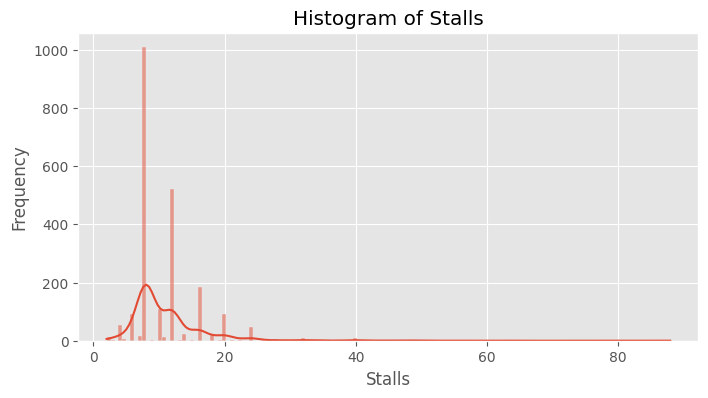

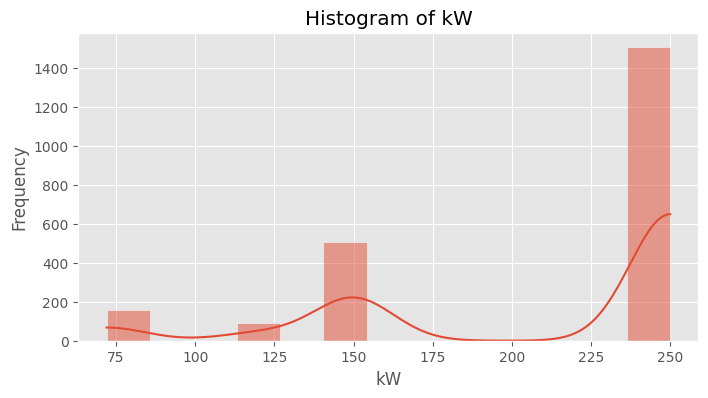

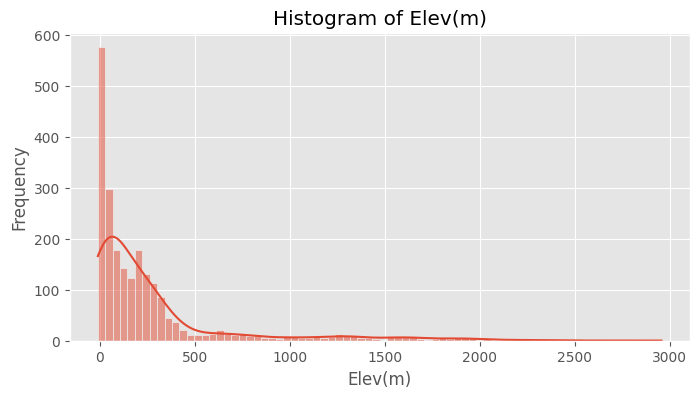

In [58]:
# Plot for numerical variables
numerical_columns = ['Stalls', 'kW', 'Elev(m)']
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(supercharge_usa[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

When evaluating the descriptive statistics and frequency plots of our numerical columns, we can see there are large outliers that cause the stalls and elevation histograms suffers from right skewedness while kilowatt histogram suffers from left skewedness.

Let's explore the categorical variables before continuing with our analysis

In [59]:
# Count unique values for categorical data
categorical_columns = ['City', 'State', 'Country']
print("\nCount of Unique Values in Categorical Columns:")
for col in categorical_columns:
    unique_count = supercharge_usa[col].nunique()
    print(f"{col}: {unique_count} unique values")


Count of Unique Values in Categorical Columns:
City: 1515 unique values
State: 52 unique values
Country: 1 unique values


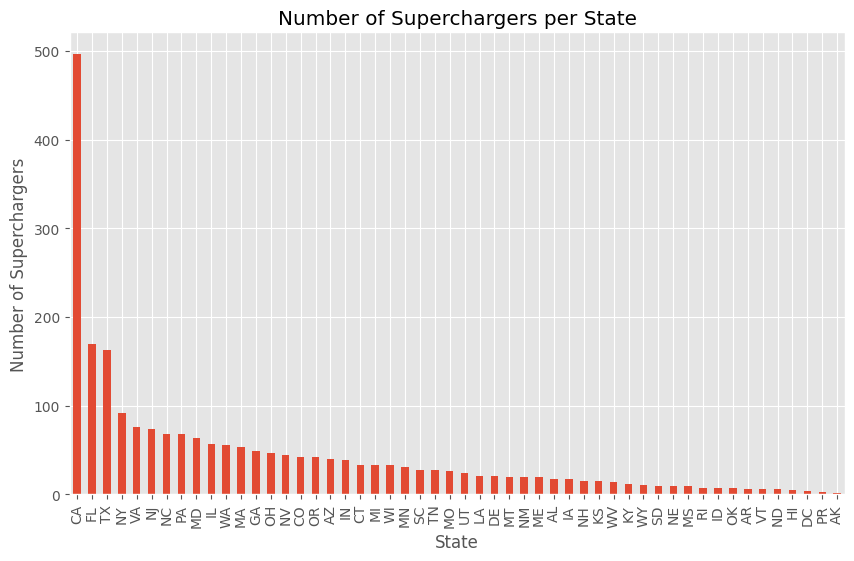

In [60]:
categorical_columns = ['State']
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    supercharge_usa[col].value_counts().plot(kind='bar')
    plt.title(f'Number of Superchargers per {col}')
    plt.xlabel(col)
    plt.ylabel('Number of Superchargers')
    plt.show()


Plotting the frequency of Tesla supercharger stations across all states in our dataset, we can see that California is the leader followed distantly by Florida, Texas, New York, and Virginia.

## <b> Categorical Distirbution Analysis

**Categorical Distribution Analysis:** a graphical examination of proportion of superchargers per state distributed across the USA. It aims to provide insights into the relative frequencies or proportions of superchargers observed in each state, which helps team to see their market share in each state.

In [61]:
import matplotlib.pyplot as plt # type: ignore
import matplotlib.mlab as mlab # type: ignore
import matplotlib # type: ignore
plt.style.use('ggplot')
from matplotlib.pyplot import figure # type: ignore

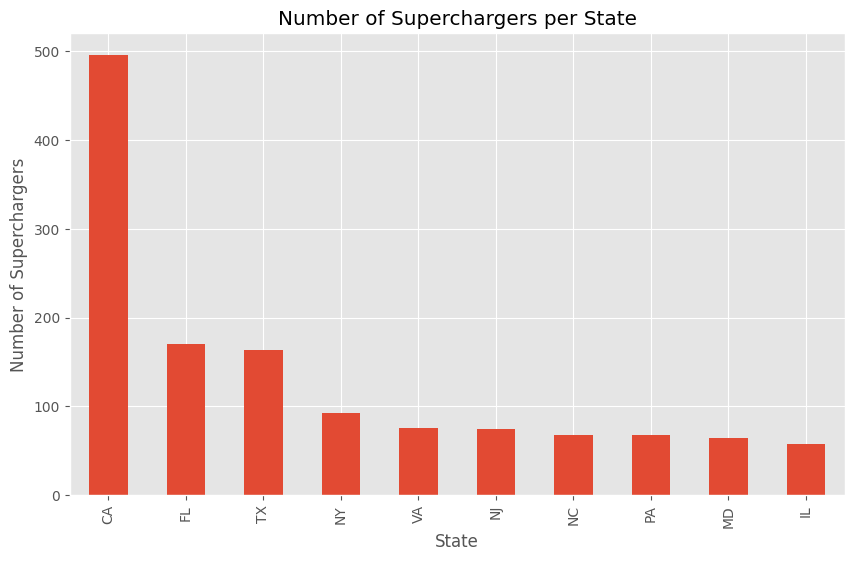

In [62]:
categorical_columns = ['State']

# Get the top five states
top_states = supercharge_usa['State'].value_counts().nlargest(10).index

# Filter the DataFrame for the top five states
df_top_states = supercharge_usa[supercharge_usa['State'].isin(top_states)]

categorical_columns = ['State']
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    df_top_states[col].value_counts().plot(kind='bar')
    plt.title(f'Number of Superchargers per {col}')
    plt.xlabel(col)
    plt.ylabel('Number of Superchargers')
    plt.show()

When viewing the top states with the highest number of supercharger stations, California has by far the largest number of stations, followed by Florida, Texas, New York, and Virginia. This graphic output shows a series of bar charts similar to the frequency chart seen above.

## <b>Time Series Analysis

<b>Forecasting:</b> With time series analysis we can forecast future trends. This is valuable for planning purposes, such as anticipating the need for more superchargers or infrastructure upgrades.<br>
<b>Trend Identification:</b> Time series analysis helps in identifying trends over time. For instance, we can use it to determine periods of rapid growth or slowdown in the installation of superchargers. This is crucial for understanding market dynamics and the adoption rate of electric vehicles.

In [63]:
supercharge_usa.loc[:, 'Open Date'] = pd.to_datetime(supercharge_usa['Open Date'])

In [64]:
supercharge_usa.set_index('Open Date', inplace=True)

C:\Users\jsjch\AppData\Local\Temp\ipykernel_50680\963698917.py:1: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



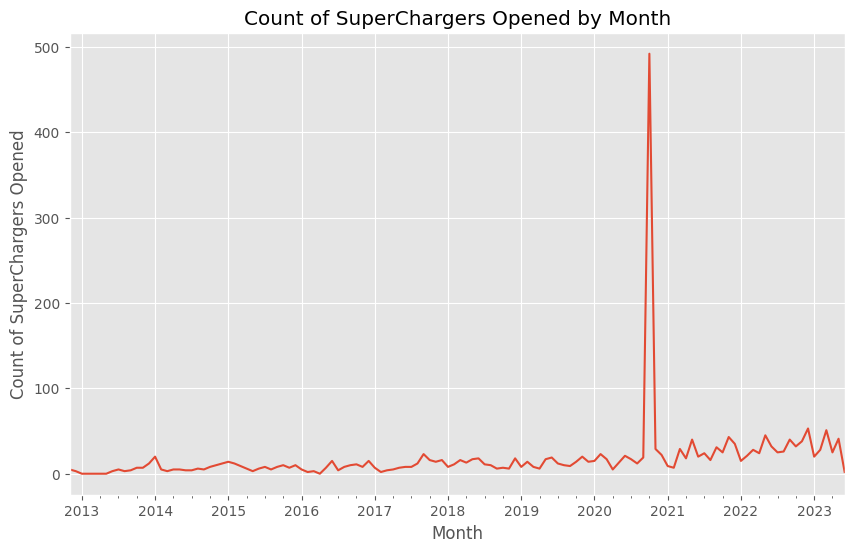

In [65]:
monthly_counts = supercharge_usa.resample('M').size()

# Visualization
plt.figure(figsize=(10,6))
monthly_counts.plot(kind='line')
plt.title('Count of SuperChargers Opened by Month')
plt.xlabel('Month')
plt.ylabel('Count of SuperChargers Opened')
plt.show()

When performing a time-based analysis of Supercharger openings in the USA, we can visualize the trend of Superchargers opened per month. Following the peak of the COVID-19 pandemic, there was a drastic rise in the number of supercharger stations which informs us that there was a huge spike in demand for EV supercharger stations.  

In [66]:
supercharge_usa.reset_index(inplace=True)

C:\Users\jsjch\AppData\Local\Temp\ipykernel_50680\1582998452.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



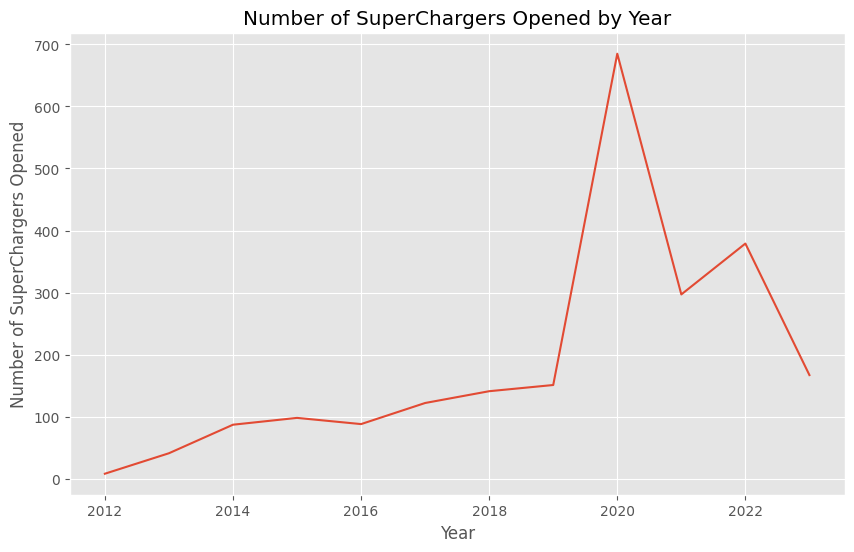

In [67]:
# Extract the year from 'OpenDate'
supercharge_usa['Year'] = supercharge_usa['Open Date'].dt.year

# Group by 'Year' and count the number of superchargers in each year
counts = supercharge_usa.groupby('Year').size()

# Line chart
plt.figure(figsize=(10,6))
counts.plot(kind='line')
plt.title('Number of SuperChargers Opened by Year')
plt.xlabel('Year')
plt.ylabel('Number of SuperChargers Opened')
plt.show()

When viewing the annual trend of Supercharger opened from 2012 to 2023 you can see a exponential increase in the number of Supercharger stations from 2019 to 2020 which representing the drastic rise in demand for Supercharger stations. This is followed by a significant drop off from 2020 to 2023, which suggests a slow down in the EV market.

From the categorical distribution analysis, California is the leader when it comes to the counts of supercharger stations. To better understand when that transition happened, let create two subplots that show the count of superchargers opened for California and the other top states by months.

- Select the range of months to view the count of SuperChargers opened for both subplots (California versus high_range_states).
- Hover over each line chart (state) that shows the state, month, and count of SuperChargers opened that month.
- Reset the x-axis so that you can view all the months and then re-select the range of months.

In [79]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Group by month and state, count superchargers, and unstack to create a column for each state
monthly_counts = df_top_states.groupby([pd.Grouper(key='Open Date', freq='M'), 'State']).size().unstack()

# Create subplots
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.1)

# Separate states into two groups based on the range of counts
high_range_states = ['CA']
low_range_states = [state for state in top_states if state not in high_range_states]

# Add high range states to the first subplot
for state in high_range_states:
    fig.add_trace(go.Scatter(
        x=monthly_counts.index,
        y=monthly_counts[state],
        mode='lines+markers',
        name=state,
        hovertext=[f'<b>State:</b> {state}<br><b>Month:</b> {date.strftime("%b %Y")}<br><b>Count:</b> {count}'
                   for date, count in zip(monthly_counts.index, monthly_counts[state])],
        hoverinfo='text'
    ), row=1, col=1)

# Add low range states to the second subplot
for state in low_range_states:
    fig.add_trace(go.Scatter(
        x=monthly_counts.index,
        y=monthly_counts[state],
        mode='lines+markers',
        name=state,
        hovertext=[f'<b>State:</b> {state}<br><b>Month:</b> {date.strftime("%b %Y")}<br><b>Count:</b> {count}'
                   for date, count in zip(monthly_counts.index, monthly_counts[state])],
        hoverinfo='text'
    ), row=2, col=1)

# Update layout
fig.update_layout(
    title='Count of SuperChargers Opened by Month',
    xaxis_title='Month',
    hovermode='x unified'
)

# Display the plot
fig.show()

C:\Users\jsjch\AppData\Local\Temp\ipykernel_50680\3872963165.py:6: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



When reviewing the SuperCharger stations opened by month for California versus the other high range states, we can see that the number of stations opened in California exceeds other states by nearly 3 times following October 2020. The highest number of supercharger stations were opened in California exceeding nearly 142 stations before collasping. Similarly, the other states experienced the same collaspe in newly opened SuperCharger stations, suggesting a nation-wide collaspe in construction of new SuperCharger stations.

## <b>Resource Allocation Analysis

<b> Resource Allocation and Planning:</b> Understanding regional variations helps in efficient allocation of resources. For instance, states with higher traffic may require more stalls or higher power capacity. This analysis can inform where to invest in new infrastructure or upgrade existing facilities.

In [82]:
# Get the top state
top_states = supercharge_usa['State'].value_counts().nlargest(10).index

# Filter the DataFrame for the top state
df_top_states = supercharge_usa[supercharge_usa['State'].isin(top_states)]

# To analyze regional differences such as the average power capacity or number of stalls per supercharger by state
# Group by 'State' and calculate the mean for 'Power capacity' and 'Number of charging stalls'
grouped_data = df_top_states.groupby('State')[['kW', 'Stalls']].mean()

# Resetting the index to get 'State' as a column
grouped_data = grouped_data.reset_index()

# Display the grouped data
print(grouped_data)

  State          kW     Stalls
0    CA  208.610887  15.883065
1    FL  219.447059  10.400000
2    IL  207.789474  11.017544
3    MD  214.718750   8.640625
4    NC  224.117647  10.367647
5    NJ  215.324324   9.770270
6    NY  187.065217   9.304348
7    PA  217.294118   8.911765
8    TX  216.558282  11.601227
9    VA  219.421053   9.144737


<Figure size 1000x600 with 0 Axes>

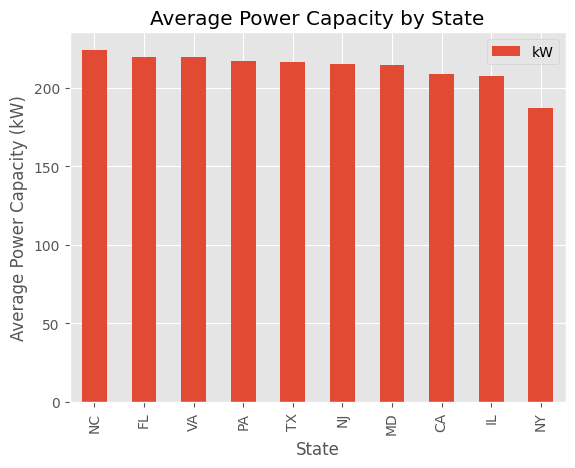

In [83]:
# Plotting the average power capacity by state
plt.figure(figsize=(10,6))
grouped_data.sort_values(by='kW', ascending=False).plot(x='State', y='kW', kind='bar')
plt.title('Average Power Capacity by State')
plt.xlabel('State')
plt.ylabel('Average Power Capacity (kW)')
plt.show()

When you visualize the average power capacity by states, you can see that SouthEast states such as North Carolina, Florida, and Virginia are the leaders. This is followed closely behind Pennsylvania, Texas, and New Jersey. These higher average power capacity in states with larger markets suggests there is sufficient infrastructure to produce larger amounts of energy in highly condense, larger metropolitan cities in states such as California and New York.

<Figure size 1000x600 with 0 Axes>

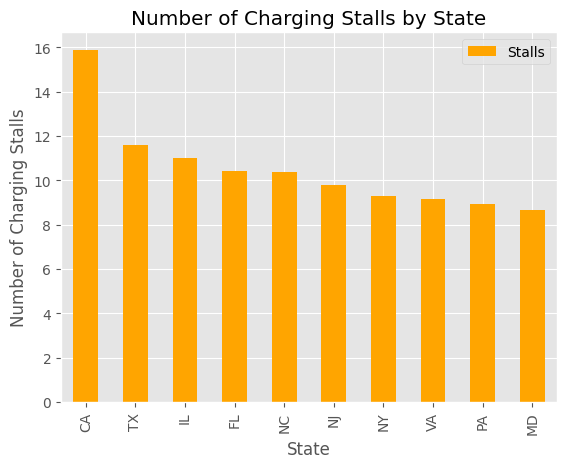

In [84]:
# Plotting the average number of charging stalls by state
plt.figure(figsize=(10,6))
grouped_data.sort_values(by='Stalls', ascending=False).plot(x='State', y='Stalls', kind='bar', color='orange')
plt.title('Number of Charging Stalls by State')
plt.xlabel('State')
plt.ylabel('Number of Charging Stalls')
plt.show()

When you visualize the number of charging stalls by states, you can see that states with larger metropolitan cities such as California (i.e., San Francisco, Los Angeles, San Diego), Texas (i.e., Austin, Dallas, Houston), and Illinous (i.e., Chicago) have the largest number of charging stalls in place.

## **Multivariate Analysis**

**Multivariate analysis:** explore relationships involving three or more variables. Here we can check how variables like power capacity(kW), elevation, and the number of charging stalls vary by state.

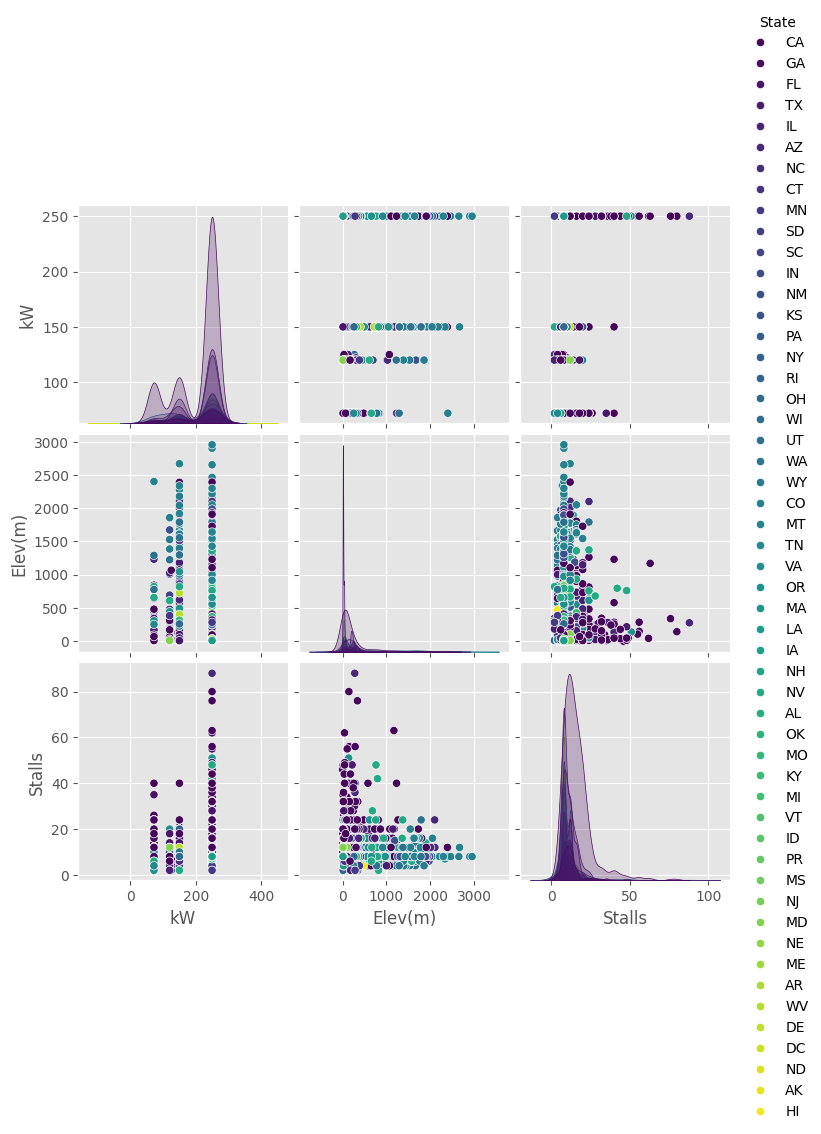

In [ ]:
# Selecting a subset of variables for multivariate analysis
# Replace these with the actual column names from your dataset
variables_of_interest = ['kW', 'Elev(m)', 'Stalls', 'State']

# Filter the DataFrame for these variables
supercharge_usa_subset = supercharge_usa[variables_of_interest]

# Creating the pair plot
sns.pairplot(supercharge_usa_subset, hue='State', diag_kind='kde', palette='viridis')
plt.show()

When you explore the relationships between the `kW`, `Elev (m)`, and `Stalls` across different states, the pair plot provides scatterplots for each variable pairs and KDE plots for individual variables.

#### **Relationships Observed:**
**1. kW vs. Elev(m):**
- **Clustering:** Most data points are clustered at lower elevations (0-500 meters).
- **kW Values:** Primarily below 200 kW, with a few outliers up to 400 kW.
- **Relationship:** No clear linear relationship between kW and Elev(m).

**2. kW vs. Stalls:**
- **Data Points:** Most are below 200 kW and 20 Stalls.
- **Outliers:** A few have higher Stalls (up to 80) and kW values (up to 400).
- **Association:** Suggests higher kW values might be linked to a higher number of Stalls, but the correlation isn't strong.

**3. Elev(m) vs. Stalls:**
- **Clustering:** Lower elevations (0-500 meters) and lower Stalls (0-20).
- **Outliers:** Some data points have higher elevations (up to 3000 meters) and higher Stalls (up to 80).
- **Relationship:** No clear linear relationship.

#### **Diagonal Plots:**
- **kW Distribution:** Peak around 100 kW.
- **Elev(m) Distribution:** Peak at 0 meters (many data points at sea level or low elevation).
- **Stalls Distribution:** Peak around 0-10 Stalls (most data points have a low number of Stalls).

#### **Key Takeaways:**
- **Correlations:** The pair plot helps visualize the relationships and potential correlations between kW, Elev(m), and Stalls.
- **State Trends:** Color-coding by state allows for identification of state-specific trends or outliers.
- **Complexity:** Lack of clear linear relationships suggests other factors or complex, non-linear relationships might be influencing the variables.

When you use the `mplot3d` package, you can explore a 3D scatter plot to visualize the relationships between `Power Capacity`, `Elevation`, and `Number of Charging Stalls` for data entries in the DataFrame. The plot allows you to explore the distribution and patterns in three-dimensional space, providing insights into the dataset's structure.

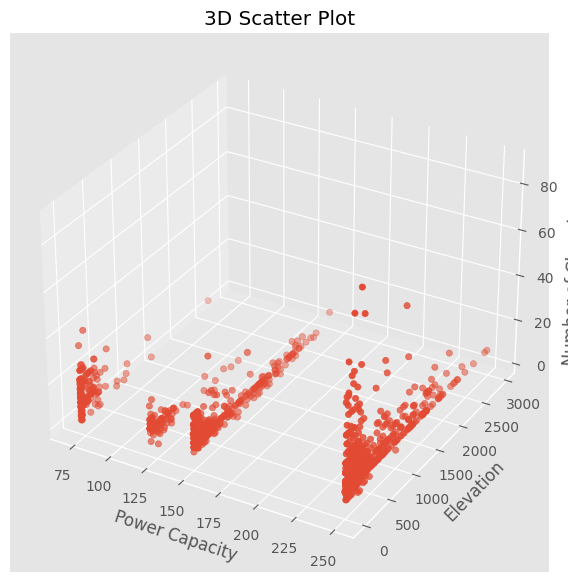

In [ ]:
from mpl_toolkits.mplot3d import Axes3D # type: ignore

# Filter the DataFrame for variables for the 3D plot
# Here, using 'Power capacity', 'Elevation', and 'Number of charging stalls'
supercharge_usa_3d = supercharge_usa[['kW', 'Elev(m)', 'Stalls']]

# Creating a 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(supercharge_usa_3d['kW'], supercharge_usa_3d['Elev(m)'], supercharge_usa_3d['Stalls'])

# Setting labels
ax.set_xlabel('Power Capacity')
ax.set_ylabel('Elevation')
ax.set_zlabel('Number of Charging Stalls')

plt.title('3D Scatter Plot')
plt.show()

**1. Power Capacity vs. Elevation:**
- **Clusters:** There are distinct clusters of data points along both the Power Capacity and Elevation axes.
- **Power Capacity:** Data points are primarily clustered around mid-level Power Capacity values, ranging from 75 to 250.
- **Elevation:** Clustering is noticeable at different elevation levels, ranging from 0 to 3000 meters.

**2. Power Capacity vs. Charging Stalls:**
- **Distribution:** Data points vary across the number of charging stalls, ranging from 0 to 80.
- **Patterns:** Look for any trends between Power Capacity and the number of charging stalls to identify possible correlations.

**3. Elevation vs. Charging Stalls:**
- **Spread:** The data points show varying numbers of charging stalls across different elevation levels.
- **Correlations:** Consider whether certain elevations are associated with higher or lower numbers of charging stalls.

## <b> Geospatial Analysis

<b>Identifying Coverage Gaps:</b> Mapping can reveal areas that are underserved by superchargers. This information is crucial for planning the expansion of the charging network to ensure adequate coverage and convenience for electric vehicle (EV) users. <br>
<b>Strategic Planning:</b> For businesses and policymakers, the geographic visualization aids in strategic decision-making regarding where to invest in additional infrastructure, considering factors like population density, traffic patterns, and proximity to major highways.

In [87]:
supercharge_usa.shape

(2264, 14)

In [121]:
# %pip install plotly-geo==1.0.0
# %pip install geopandas==0.3.0
# %pip install pyshp==1.2.10
# %pip install shapely==1.6.3

In [122]:
# %pip install plotly

In [123]:
# %pip install --upgrade pip # type: ignore

In [124]:
# %pip install --upgrade nbformat

In [88]:
import plotly.express as px # type: ignore

# Create the USA map plot
fig = px.scatter_mapbox(supercharge_usa, lat='Latitude', lon='Longitude', hover_name='Supercharger',
                        hover_data=['Street Address', 'City', 'State', 'Zip'],
                        color_discrete_sequence=['blue'], zoom=3, height=600)

fig.update_layout(mapbox_style='open-street-map')
fig.update_layout(title_text='Supercharger Locations in the USA')
fig.update_layout(margin={'r': 0, 't': 30, 'l': 0, 'b': 0})

# Display the plot
fig.show()

When creating an interactive map plot using Plotly Express, we can see the locations of superchargers in the USA. The map reveals information on areas that are underserved in supercharger stalls. There is clearly a concentration of supercharger stalls on the West and East coast, while there are less located in the central US.

## **Minimizing Geographical Distribution of EV Charging Stations**

## **Model Formulation**

### **Sets and Indices**

$x \in \text{Newly Built Charging Stations}=\{\text{1}, \text{0}\}$

$d \in \text{Distance}=\{\text{Location i}, \text{Location j}\}$

### **Decision Variables**

$\text{x}_{i} \in \mathbb{1, 0}$: Whether a charging station is newly built at location $i$.

$\text{d}_{i,j} \in \mathbb{D}^{+}$: Distance between the newly built location $i$ and $j$.

### **Objective Function**

- **Distance**: Minimize the total distance between newly built EV supercharging stations.

\begin{equation}
\text{Minimize} \quad Z = \sum_{i = \text{1}} \sum_{j = \text{1}} {\text{D}_{i,j}*\text{x}_{i} *\text{x}_{j}}
\end{equation}

### **Constraints**

- **Station Constraint**: For each station $i$ selected in the route, number of stations $x_i$, should be between the minimum and maximum number of charging stations.

\begin{equation}
\text{Min Charging Stations} \leq \sum_{\text{i=1}}{\text{$x_i$}} \leq \text{Max Charging Stations}
\end{equation}

- **Non-Binary Constraint**: Ensure that each new location is either selected or not:

\begin{equation}
{x_i \in \text{0,1}}{} \quad \forall i \in \text{1, 2, ..., N}
\end{equation}

**Objective**: Using GPS coordinates we plan to construct a network graph where nodes will represent Supercharger stations and edges will represent possible paths between them. With this graph we can solve the optimization problem of finding the shortest path between two points.

Firstly, lets filter out our US supercharge dataframe to only include the EV supercharger stations from state of California. Additionally, the range of dates that we're interested in are the supercharger stations opened between the beginning of 2019 and end of Q3 in 2023.   

In [89]:
# Filter the DataFrame for rows where the state is 'CA'
supercharge_usa = supercharge_usa[(supercharge_usa['State'] == 'CA')]

# Specify the range of dates you want to filter
start_date = '2019-01-01'
end_date = '2023-12-31'

# Filter the DataFrame based on the specified range of dates
supercharge_usa = supercharge_usa[(supercharge_usa['Open Date'] >= start_date) & (supercharge_usa['Open Date'] <= end_date)]

# Checking for missing or null values in the USA subset
print("Missing values for USA per column:")
print(supercharge_usa.isnull().sum())

Missing values for USA per column:
Open Date         0
Supercharger      0
Street Address    0
City              0
State             0
Zip               0
Country           0
Stalls            0
kW                0
GPS               0
Elev(m)           0
Latitude          0
Longitude         0
Year              0
dtype: int64


In [90]:
supercharge_usa['Open Date'] = pd.to_datetime(supercharge_usa['Open Date'])
recent_stations = supercharge_usa.sort_values('Open Date', ascending=False)

In [91]:
# Drop the GPS column
supercharge_usa.drop(['GPS'],axis= 1,inplace=True)

In [92]:
supercharge_usa.dtypes

Open Date         datetime64[ns]
Supercharger              object
Street Address            object
City                      object
State                     object
Zip                       object
Country                   object
Stalls                     int64
kW                       float64
Elev(m)                    int64
Latitude                 float64
Longitude                float64
Year                       int32
dtype: object

In [130]:
# %pip install gurobipy

In [131]:
# %pip install scipy

In [ ]:
from scipy.optimize import linprog # type: ignore
import numpy as np # type: ignore

num_stations = len(supercharge_usa)

# Create a distance matrix
dist_matrix = np.zeros((num_stations, num_stations))
for i in range(num_stations):
    for j in range(num_stations):
        coords_1 = (supercharge_usa.iloc[i]['Latitude'], supercharge_usa.iloc[i]['Longitude'])
        coords_2 = (supercharge_usa.iloc[j]['Latitude'], supercharge_usa.iloc[j]['Longitude'])
        dist_matrix[i, j] = geopy.distance.distance(coords_1, coords_2).km

# Flatten the distance matrix for the objective function
c = dist_matrix.flatten()

# Constraints
A_eq = np.zeros((num_stations, num_stations**2))
for i in range(num_stations):
    A_eq[i, i*num_stations:(i+1)*num_stations] = 1

b_eq = np.ones(num_stations)

# Bounds for decision variables (0 or 1)
x_bounds = [(0, 1) for _ in range(num_stations**2)]

# Solve the linear programming problem
result = linprog(c, A_eq=A_eq, b_eq=b_eq, bounds=x_bounds, method='highs')

# Extract the solution
solution = result.x.reshape((num_stations, num_stations))

# Print the solution
print("Optimal solution:")
print(solution)

Optimal solution:
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


<b>Decision Variables


The decision variables for the objective function have been created based on unique identifiers generated for electric vehicle charging stations. The process begins by forming a unique identifier for each station using relevant information such as `Supercharger`, `Street Address`, `City`, `State`, and `Zip code`. The resulting unique identifiers are stored in the `unique_id` column of the `recent_stations` dataset.

In [133]:
# Creating an unique identifier
recent_stations['unique_id'] = recent_stations['Supercharger'] + "_" + recent_stations['Street Address'] + "_" + recent_stations['City'] + "_" + recent_stations['State'] + "_" + recent_stations['Zip']
station_ids = recent_stations['unique_id'].tolist()

To identify duplicate entries, a subset of the `recent_stations` dataset containing duplicated `unique_id` values is extracted and stored in the 'duplicates' variable.

In [134]:
duplicates = recent_stations[recent_stations['unique_id'].duplicated(keep=False)]
duplicates

,Open Date,Supercharger,Street Address,City,State,Zip,Country,Stalls,kW,GPS,Elev(m),Latitude,Longitude,Year,unique_id


Subsequently, if additional columns (`Latitude` and `Longitude`) were exclusively added to the `supercharger_usa` dataset, they are incorporated into the `recent_stations` dataset as well. This involves splitting the `GPS` column into latitude and longitude components, converting them to float type, and updating the corresponding columns in `recent_stations`.

In [135]:
# If these columns were only added to supercharger_usa, add them to recent_stations as well
recent_stations[['Latitude', 'Longitude']] = recent_stations['GPS'].str.split(', ', expand=True)
recent_stations['Latitude'] = recent_stations['Latitude'].astype(float)
recent_stations['Longitude'] = recent_stations['Longitude'].astype(float)

In [136]:
recent_stations.set_index('unique_id', inplace=True)

In [137]:
# Drop the GPS column
recent_stations.drop(['GPS'],axis= 1,inplace=True)

In [ ]:
recent_stations.head()

,Open Date,Supercharger,Street Address,City,State,Zip,Country,Stalls,kW,Elev(m),Latitude,Longitude,Year
unique_id,,,,,,,,,,,,,
"Walnut Creek, CA_2290 Oak Grove Rd_Walnut Creek_CA_94598",2023-06-02,"Walnut Creek, CA",2290 Oak Grove Rd,Walnut Creek,CA,94598,USA,12,250.0,37,37.930078,-122.014812,2023
"Tustin - Franklin Ave, CA_14461 Franklin Ave_Tustin_CA_92780",2023-05-26,"Tustin - Franklin Ave, CA",14461 Franklin Ave,Tustin,CA,92780,USA,36,250.0,19,33.716605,-117.810303,2023
"Yorba Linda, CA_18601 Yorba Linda Blvd_Yorba Linda_CA_92886",2023-05-25,"Yorba Linda, CA",18601 Yorba Linda Blvd,Yorba Linda,CA,92886,USA,8,250.0,121,33.889175,-117.808082,2023
"Grass Valley, CA_692 Freeman Lane_Grass Valley_CA_95949",2023-05-25,"Grass Valley, CA",692 Freeman Lane,Grass Valley,CA,95949,USA,12,250.0,744,39.199798,-121.064216,2023
"Yermo - Sunrise Canyon Rd, CA_40865 Sunrise Canyon Rd_Yermo_CA_92398",2023-05-24,"Yermo - Sunrise Canyon Rd, CA",40865 Sunrise Canyon Rd,Yermo,CA,92398,USA,40,250.0,577,34.919528,-116.769185,2023


The decision variables `station_vars` are each charging station assigned to a binary decision variable (0 or 1) denoted by the unique identifiers in `station_ids`. These variables are created with the specified variable type (GRB.BINARY) and are named "Station" within the optimization model.

In [142]:
from scipy.optimize import linprog # type: ignore
import numpy as np # type: ignore
import geopy.distance # type: ignore

# Define the number of stations
num_stations = len(supercharge_usa)

# Create a distance matrix
dist_matrix = np.zeros((num_stations, num_stations))
for i in range(num_stations):
    for j in range(num_stations):
        coords_1 = (supercharge_usa.iloc[i]['Latitude'], supercharge_usa.iloc[i]['Longitude'])
        coords_2 = (supercharge_usa.iloc[j]['Latitude'], supercharge_usa.iloc[j]['Longitude'])
        dist_matrix[i, j] = geopy.distance.distance(coords_1, coords_2).km

# Flatten the distance matrix for the objective function
c = dist_matrix.flatten()

# Constraints
A_eq = np.zeros((num_stations, num_stations**2))
for i in range(num_stations):
    A_eq[i, i*num_stations:(i+1)*num_stations] = 1

b_eq = np.ones(num_stations)

# Bounds for decision variables (0 or 1)
x_bounds = [(0, 1) for _ in range(num_stations**2)]

# Solve the linear programming problem
result = linprog(c, A_eq=A_eq, b_eq=b_eq, bounds=x_bounds, method='highs')

# Extract the solution
solution = result.x.reshape((num_stations, num_stations))

# Print the solution
print("Optimal solution:")
print(solution)

# Create the USA map plot with optimal locations
optimal_locations = []
optimal_superchargers = []
for i in range(num_stations):
    if solution[i, i] > 0.5:  # Assuming binary decision variable
        optimal_locations.append((supercharge_usa.iloc[i]['Latitude'], supercharge_usa.iloc[i]['Longitude']))
        optimal_superchargers.append(supercharge_usa.iloc[i]['Supercharger'])

optimal_locations_df = pd.DataFrame(optimal_locations, columns=['Latitude', 'Longitude'])
optimal_locations_df['Supercharger'] = optimal_superchargers

import plotly.express as px # type: ignore

fig = px.scatter_mapbox(optimal_locations_df, lat='Latitude', lon='Longitude', hover_name='Supercharger',
                        color_discrete_sequence=['blue'], zoom=3, height=600)

fig.update_layout(mapbox_style='open-street-map')
fig.update_layout(title_text='Optimized Supercharger Locations in the USA')
fig.update_layout(margin={'r': 0, 't': 30, 'l': 0, 'b': 0})

# Display the plot
fig.show()

Optimal solution:
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


<b>Objective Function

A distance calculation function, named calculate_distance, is defined to compute the distance in miles between two charging stations. The function takes two station objects as input and uses their latitude and longitude coordinates to calculate the distance in kilometers, which is then converted to miles (multiplying by 0.621371).

In [143]:
# define a function to calculate distances in miles
def calculate_distance(station1, station2):
    coords_1 = (station1['Latitude'], station1['Longitude'])
    coords_2 = (station2['Latitude'], station2['Longitude'])
    return geopy.distance.distance(coords_1, coords_2).km * 0.621371

The objective is defined as the sum of distances between station pairs, multiplied by their corresponding binary decision variables. The summation is performed over all pairs of charging stations (i, j) where i is not equal to j. Finally, the objective function is assigned to the optimization model (model) using the setObjective method.

In [144]:
import numpy as np # type: ignore
from scipy.optimize import minimize # type: ignore

# Define the distance calculation function
def calculate_distance(station1, station2):
    return np.linalg.norm(station1 - station2)

# Precompute the distance matrix
def precompute_distance_matrix(station_ids, recent_stations):
    num_stations = len(station_ids)
    dist_matrix = np.zeros((num_stations, num_stations))
    for i in range(num_stations):
        for j in range(num_stations):
            if i != j:
                dist_matrix[i, j] = calculate_distance(recent_stations.loc[station_ids[i]], recent_stations.loc[station_ids[j]])
    return dist_matrix

# Define the objective function
def objective(x, dist_matrix):
    total_distance = np.sum(dist_matrix * np.outer(x, x))
    return total_distance

# Use the actual station IDs and recent_stations DataFrame
station_ids = recent_stations.index.tolist()
recent_stations = recent_stations[['Latitude', 'Longitude']]

# Precompute the distance matrix
dist_matrix = precompute_distance_matrix(station_ids, recent_stations)

# Initial guess for the decision variables (all zeros)
x0 = np.zeros(len(station_ids))

# Constraints: sum of x should be equal to the number of stations
constraints = {'type': 'eq', 'fun': lambda x: np.sum(x) - len(station_ids)}

# Bounds for decision variables (0 or 1)
bounds = [(0, 1) for _ in range(len(station_ids))]

# Perform the optimization
result = minimize(objective, x0, args=(dist_matrix,), method='SLSQP', bounds=bounds, constraints=constraints)

# Extract the solution
solution = result.x

# Print the solution
print("Optimal solution:")
print(solution)

Optimal solution:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

The goal is to minimize the total distance, and the optimization model is configured accordingly.

<b>Constraints

The constraints for the optimization model are established based on estimates and projections related to electric vehicle (EV) demand and charging station requirements. Our team is interested in minimizing the distance between newly built EV charging stations in California.

In [145]:
# Estimate of yearly sales in California given the ratio of Telsa supercharger stations over a similar period of time and a more comprehensive calculated
# Tesla yearly car sales (https://finance.yahoo.com/news/california-ev-sales-top-20-through-q3-with-teslas-model-y-leading-the-way-162349292.html)
data = {
    2019: 99048,
    2020: 92396,
    2021: 161863,
    2022: 260702,
    2023: 291518 # Approx estimation (290,000 were the sales until Q3)
}

# Calculating the percentage increase for each year compared to the previous year
percentage_increase = {}
for year in range(2020, 2024):
    increase = (data[year] - data[year - 1]) / data[year - 1] * 100
    percentage_increase[year] = increase

percentage_increase

{2020: -6.715935707939585,
 2021: 75.18399064894584,
 2022: 61.06336840414425,
 2023: 11.82039263220075}

As shown above, the future demand for EV charging stations is projected based on the estimated number of EVs in California, the average charging time, operational hours, and the average number of chargers per station.

In [146]:
average_increase = sum(percentage_increase.values()) / len(percentage_increase)
average_increase

35.337953994337816

Now we initialize and compute parameters for electric vehicle (EV) charging infrastructure in California. It estimates current and future demand based on EV numbers, average charging time, operational hours, and population growth. The projection considers average Tesla sales growth, resulting in calculations for minimum and maximum required charging stations. The script outputs the current minimum stations needed and the projected range for future stations.

In [147]:
# Initial Data
estimated_number_of_EVs = 100000  # Estimated number of EVs cars in California (https://insideevs.com/news/694269/california-electric-car-sales-2023q3/)
average_charging_time = 0.5  # in hours
operational_hours = 24
number_of_chargers_per_station = 10 # Average number of chargers per station worldwide (https://www.iea.org/reports/global-ev-outlook-2022/trends-in-charging-infrastructure)

# Tesla yearly average percentage increase
average_increase_percentage = sum(percentage_increase.values()) / len(percentage_increase)

# Assume a constant annual population growth rate
annual_population_growth_rate = 0.01 # 1% growth

# Future projection years
projection_years = 4  # Projecting for the next 5 years

# Future EV Demand Calculation
future_EV_demand = estimated_number_of_EVs
for year in range(projection_years):
    # Increasing EV demand by the average Tesla sales growth rate
    future_EV_demand *= (1 + average_increase_percentage / 100)
    # Adjusting for population growth
    future_EV_demand *= (1 + annual_population_growth_rate)

# Estimating current demand for charging stations
current_demand = estimated_number_of_EVs
charging_time_per_cycle = average_charging_time
total_charging_time = operational_hours * number_of_chargers_per_station
cycles_per_station = total_charging_time / charging_time_per_cycle
min_stations = current_demand / cycles_per_station

# Calculating Future Demand for Charging Stations
future_demand_for_stations = future_EV_demand / cycles_per_station

# Calculating Growth Rate in Demand for Charging Stations
growth_rate = ((future_demand_for_stations - min_stations) / min_stations) * 100

# Maximum Stations Calculation
max_stations = min_stations * (1 + growth_rate / 100)

print("Minimum Stations Required Now:", int(min_stations))
print("Maximum Stations Required in Future:", int(max_stations))

Minimum Stations Required Now: 208
Maximum Stations Required in Future: 727


The results indicate the estimated requirements for electric vehicle (EV) charging stations. A minimum of approximately 208 charging stations is deemed necessary to meet the demand. The calculated projection suggests that the demand may increase, necessitating a maximum of around 727 charging stations to adequately accommodate the expected growth in electric vehicles over the next 4 projected years.


Lets add these constraints to our optimization model. The first constraint enforces that the sum of the binary decision variables (`station_vars`) representing selected charging stations must be greater than or equal to the minimum number of stations required (`min_stations`). The second constraint ensures that the sum of these decision variables does not exceed the calculated maximum number of stations needed (`max_stations`).

In [148]:
from scipy.optimize import linprog # type: ignore
import numpy as np # type: ignore

# Define the number of stations
num_stations = len(supercharge_usa)

# Create a distance matrix
dist_matrix = np.zeros((num_stations, num_stations))
for i in range(num_stations):
    for j in range(num_stations):
        coords_1 = (supercharge_usa.iloc[i]['Latitude'], supercharge_usa.iloc[i]['Longitude'])
        coords_2 = (supercharge_usa.iloc[j]['Latitude'], supercharge_usa.iloc[j]['Longitude'])
        dist_matrix[i, j] = geopy.distance.distance(coords_1, coords_2).km

# Flatten the distance matrix for the objective function
c = dist_matrix.flatten()

# Constraints
A_eq = np.zeros((num_stations, num_stations**2))
for i in range(num_stations):
    A_eq[i, i*num_stations:(i+1)*num_stations] = 1

b_eq = np.ones(num_stations)

# Bounds for decision variables (0 or 1)
x_bounds = [(0, 1) for _ in range(num_stations**2)]

# Additional constraints for the sum of binary decision variables
A_ub = np.zeros((2, num_stations**2))
A_ub[0, :] = 1
A_ub[1, :] = -1
b_ub = [max_stations, -min_stations]

# Solve the linear programming problem
result = linprog(c, A_eq=A_eq, b_eq=b_eq, A_ub=A_ub, b_ub=b_ub, bounds=x_bounds, method='highs')

# Extract the solution
solution = result.x.reshape((num_stations, num_stations))

# Print the solution
print("Optimal solution:")
print(solution)


Optimal solution:
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


<b> Optimize

In [149]:
# model.Params.MIPGap=0.10

In [150]:
# model.optimize()

The optimization results suggests a presolve step removing redundant constraints and variables, resulting in a reduced problem size. The root was interrupted after 472 iterations, and the optimization explored 1 node. The optimal solution with an objective value of approximately 3.24 million. The best lower bound on the optimal objective value is around 2.92 million, resulting in a small optimality gap of approximately 9.99%.

Lets figure out the optimal locations where California stations should be built. If the status is optimal:

Here's a breakdown of the code:

**Initialization:** The selected_stations list is initialized to store the stations selected for building.

**Optimality Check:** It checks if the optimization model's status is optimal (model.status == GRB.OPTIMAL). This condition ensures that a feasible and optimal solution has been found.

**Solution Retrieval:** If the solution is optimal, it retrieves the values of the decision variables (stations) from the optimization model using model.getAttr('x', station_vars). The solution is stored in the solution variable.

**Selection of Stations:** It iterates over the solution to identify stations with positive decision variable values (solution[station] > 0). For each selected station, it appends the station name to the selected_stations list and prints a message indicating that the station should be built.

The resulting selected_stations list contains the names of the stations that the optimization model recommends for construction based on the optimal solution.

In [151]:
selected_stations = {}

# Check if the optimization was successful
if result.success:
    solution = result.x.reshape((num_stations, num_stations))
    for i in range(num_stations):
        if solution[i, i] > 0.5:  # Assuming binary decision variable
            station_name = supercharge_usa.iloc[i]['Supercharger']
            station_state = supercharge_usa.iloc[i]['State']
            if station_state not in selected_stations:
                selected_stations[station_state] = []
            selected_stations[station_state].append(station_name)
            print(f"Station {station_name}: Build")

# Print the categorized selected stations
for state, stations in selected_stations.items():
    print(f"\nStations to be built in {state}:")
    for station in stations:
        print(f"- {station}")


Station Richmond, CA: Build
Station San Luis Obispo - Higuera St, CA: Build
Station El Centro - Wake Ave, CA: Build
Station Vista, CA: Build
Station San Jose - Saratoga Ave, CA: Build
Station Soledad - Front St, CA: Build
Station Chula Vista - Telegraph Canyon Rd, CA: Build
Station Newark, CA: Build
Station San Rafael, CA: Build
Station Red Bluff - S Main St, CA: Build
Station Santa Barbara, CA: Build
Station Goleta, CA: Build
Station Marina Del Rey, CA: Build
Station San Jose - East Capitol Expressway, CA: Build
Station Paso Robles, CA: Build
Station Cottonwood, CA: Build
Station Truckee - Soaring Way, CA: Build
Station Redding, CA: Build
Station Anaheim - Santa Ana Canyon Rd, CA: Build
Station Yuba City, CA: Build
Station San Diego - Camino Del Sur, CA: Build
Station San Ramon - Diablo Plaza, CA: Build
Station Menifee, CA: Build
Station Windsor, CA: Build
Station San Jose - Blossom Hill Rd, CA: Build
Station San Jose - Santana Row, CA: Build
Station Irvine - Michelson Dr, CA: Build
S

From the selected stations list, the output identifies recurring cities such as San Francisco, Los Angeles, and San Diego. We can infer that metropoulos have higher demand for charging stations due to the greater concentration of stations. This could be difficult to view how these charging stations can minimize the distance for EV drivers from just this list. 

To better understand how each station built allows for the shortest distance travelled to a charging station, lets calculate the distances each station has to its closest neighbor and present them in a mapped scatter plot.

In [ ]:
import numpy as np
from scipy.spatial import KDTree
import plotly.graph_objects as go

# Create a scatter mapbox plot for the supercharger locations
fig = go.Figure()

# Add scatter points for each supercharger location
fig.add_trace(go.Scattermapbox(
    lat=optimal_locations_df['Latitude'],
    lon=optimal_locations_df['Longitude'],
    mode='markers',
    marker=go.scattermapbox.Marker(size=9, color='blue'),
    text=optimal_locations_df['Supercharger'],
    hoverinfo='text',
    name='Supercharger Locations'
))

# Create a KDTree for efficient nearest neighbor search
coords = optimal_locations_df[['Latitude', 'Longitude']].values
tree = KDTree(coords)

# Calculate distances to nearest neighbors
distances = []
for i in range(len(optimal_locations_df)):
    distance, _ = tree.query([coords[i]], k=2)
    distances.append(distance[0][1])

# Convert distances from degrees to miles
distances_miles = [d * 69 for d in distances]

# Determine the bin sizes for coloring the paths
bins = np.linspace(min(distances_miles), max(distances_miles), num=5)
colors = ['green', 'yellow', 'orange', 'red']

# Create a dictionary to store lines by distance range
lines_by_range = {i: {'lat': [], 'lon': [], 'color': colors[i]} for i in range(len(colors))}

# Add lines between each location and its nearest neighbor with color coding
for i in range(len(optimal_locations_df)):
    distance, indices = tree.query([coords[i]], k=2)
    nearest_index = indices[0][1]
    distance_miles = distance[0][1] * 69
    bin_index = np.digitize(distance_miles, bins) - 1
    bin_index = min(bin_index, len(colors) - 1)  # Ensure bin_index is within range
    color = colors[bin_index]
    lines_by_range[bin_index]['lat'].append([optimal_locations_df.iloc[i]['Latitude'], optimal_locations_df.iloc[nearest_index]['Latitude']])
    lines_by_range[bin_index]['lon'].append([optimal_locations_df.iloc[i]['Longitude'], optimal_locations_df.iloc[nearest_index]['Longitude']])

# Add lines to the plot with a single legend entry for each distance range
for bin_index, data in lines_by_range.items():
    for lat, lon in zip(data['lat'], data['lon']):
        fig.add_trace(go.Scattermapbox(
            lat=lat,
            lon=lon,
            mode='lines',
            line=go.scattermapbox.Line(width=2, color=data['color']),
            hoverinfo='none',
            showlegend=False  # Hide individual lines from the legend
        ))
    # Add a single legend entry for the distance range
    fig.add_trace(go.Scattermapbox(
        lat=[None],  # Dummy data for legend entry
        lon=[None],  # Dummy data for legend entry
        mode='lines',
        line=go.scattermapbox.Line(width=2, color=data['color']),
        name=f'Distance range: {bins[bin_index]:.2f} - {bins[bin_index + 1]:.2f} miles'
    ))

# Update the layout of the map
fig.update_layout(
    mapbox=dict(
        style='open-street-map',
        center=dict(lat=36.7783, lon=-119.4179),  # Centered on California
        zoom=5
    ),
    margin=dict(r=0, t=0, l=0, b=0),
    title='Optimized Supercharger Locations in California with Nearest Neighbor Paths'
)

# Display the plot
fig.show()

In the mapped scatter plot, we clearly see that the distance range between charging stations in the San Francisco, Los Angeles, and San Diego region shorten the distance to EV drivers by a minimum of around 20 miles. According to the "West Coast Electric Highway" initiative, in California, an EV driver is typically within 25 to 50 miles of a charging station, and these optimized locations for DC fast chargers could make charging more readily availalbe for most drivers in the state.